## Atividade 13 - Trabalhando com Schedulers no OpenMP

### Schedules

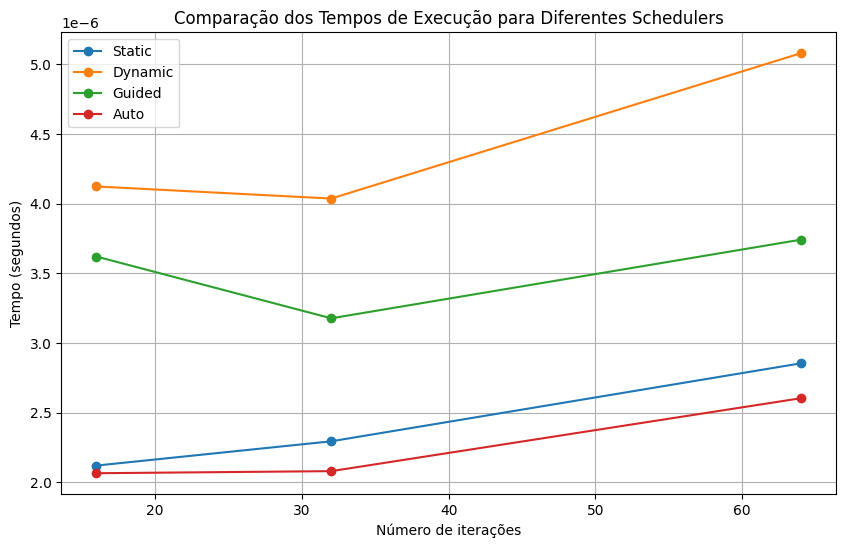

In [4]:
import matplotlib.pyplot as plt

N_values = [16, 32, 64]
times_static = [2.11969e-06, 2.29385e-06, 2.85357e-06]
times_dynamic = [4.12297e-06, 4.03635e-06, 5.07943e-06]
times_guided = [3.62005e-06, 3.17674e-06, 3.74112e-06]
times_auto = [2.06474e-06, 2.07964e-06, 2.60305e-06]

plt.figure(figsize=(10, 6))
plt.plot(N_values, times_static, label='Static', marker='o')
plt.plot(N_values, times_dynamic, label='Dynamic', marker='o')
plt.plot(N_values, times_guided, label='Guided', marker='o')
plt.plot(N_values, times_auto, label='Auto', marker='o')


plt.title('Comparação dos Tempos de Execução para Diferentes Schedulers')
plt.xlabel('Número de iterações')
plt.ylabel('Tempo (microsegundos)')
plt.legend()
plt.grid()


plt.show()


In [5]:
import pandas as pd

tempos_medios = {
    'Scheduler': ['Static', 'Dynamic', 'Guided', 'Auto'],
    'Tempo Médio (s)': [
        sum(times_static) / len(times_static),
        sum(times_dynamic) / len(times_dynamic),
        sum(times_guided) / len(times_guided),
        sum(times_auto) / len(times_auto)
    ]
}

df = pd.DataFrame(tempos_medios)
df

,Scheduler,Tempo Médio (s)
0,Static,0.000002
1,Dynamic,0.000004
2,Guided,0.000004
3,Auto,0.000002


Analisando os dados obtidos através da execução de um código que usa diferentes schedulers para distribuir as iterações entre threads, afim de traçar alguma estratégia no processo de paralelização, é possível chegar em algumas conclusões. Para o teste foram utilizados três valores de número de iterações, 16, 32 e 64. Comparando os tempos de execução de cada um dos schedulers para os números de iteração, é notável que os schedulers *Static* e *Auto* mantiveram uma consistência. Isso porque, o *Static* se comporta dividindo as iterações igualmente entre as threads, então o tempo vai aumentar linearmente com o número de iterações, como é visto no gráfico. E o *Auto* segue estratégias otimizadas pelo compilador, o que faz com que para cada tamanho de complexidade que as threads terão que lidar, idealmente, a melhor estratégia é escolhida. Enquanto isso o scheduler *Dynamic* apresenteu variações significativas em resposta aos números de iteração, porque o comportamente desse scheduler é que as threads pegam novos blocos de iterações conforme terminam o trabalho, então se as iterações forem desbalanceadas ou as threads não terminarem em tempos próximos, haverá maior sobrecarga na gestão das tarefas, resultando em variações mais amplas nos tempos de execução. O scheduler *Guided* também mostrou alguma pequena variação de tempo de execução, isso acontece porque ele distribui blocos maiores no início e blocos menores no final. Essa estratégia pode levar a tempos de execução ligeiramente diferentes dependendo da forma como as threads concluem os blocos iniciais.

### Cálculo do PI

A abordagem que teve o melhor desempenho foi a *parallel for*, nesse caso o valor de MIN_BLK influenciou significativamente o tempo de execução, sendo que com o valor mais baixo (1024) o tempo de execução foi maior do que para os outros dois valores superiores de forma crescente (1024 * 256 e 1024 * 256 * 256), isso acontece porque um valor muito baixo aumenta a sobrecarga de criação de tarefas.

### Manipulação de Efeitos Colaterais no Vetor

A pré alocação de memória teve o melhor desempenho em relação ao omp critical, isso porque ele garante que não existam acessos simultâneos a estrutura compartilhada, o que acaba prejudicando as operações em paralelo, já a abordagem de pré alocação de memória paraleliza o processo de montagem do vetor, otimizando o tempo de execução nessa etapa